In [2]:
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt

1)Finding the Explosion curve using the temperature difference  critera. If T_inital - T >10, then it is defined the explosion occurs, which also validated with the realtion using  concertation of C3H8. Also the we can find the explosion curve in the temperature between 600 -1200K

In [26]:



#import csv

# Input variables
fuel_species = 'C3H8'
npoints = 1 # Number of points to consider
# Pressures of interest
P = [10, 100, 200, 300, 500, 1000, 3000, 1e4, 2e4, 3e4, 1e5, 5e5, 1e6, 1e7, 1e8]
# Temperatures explosion occurs for each pressure
Temps = np.zeros(len(P))
Temps[0] = 1000
exploded = False

i = -1

for Pi in P:
    i += 1
    for Ti in range(600,1200,10):
        
        #Display
        print('T %9.f P %11.2f' % (Ti, Pi))
        dt = 1 # Time step size [s]
        time = 0.0 # Initial time of interest [s]
        
        # Set up the gas
        gas = ct.Solution('gri30.yaml')
        gas.set_equivalence_ratio(1.0, fuel_species, 'O2:1.0, N2:3.76')
        gas.TP = Ti, Pi
        
        # Create reactor containing the gas
        reac = ct.IdealGasConstPressureReactor(gas)
        # Add the reactor to a new ReactorNet simulator
        sim = ct.ReactorNet([reac])
        
        states = ct.SolutionArray(gas)
        ##############################################################################
        # For loop to advance in time n times
        for n in range(npoints):
            time += dt
            # Advance sim to specified time
            sim.advance(time)
            states.append(reac.thermo.state)
            if np.abs(Ti-gas.T)>10:
                exploded = True
                break
            
        if (exploded):
            exploded = False
            Temps[i] = Ti
            break




T       600 P       10.00
T       610 P       10.00
T       620 P       10.00
T       630 P       10.00
T       640 P       10.00
T       650 P       10.00
T       660 P       10.00
T       670 P       10.00
T       680 P       10.00
T       690 P       10.00
T       700 P       10.00
T       710 P       10.00
T       720 P       10.00
T       730 P       10.00
T       740 P       10.00
T       750 P       10.00
T       760 P       10.00
T       770 P       10.00
T       780 P       10.00
T       790 P       10.00
T       800 P       10.00
T       810 P       10.00
T       820 P       10.00
T       830 P       10.00
T       840 P       10.00
T       850 P       10.00
T       860 P       10.00
T       870 P       10.00
T       880 P       10.00
T       890 P       10.00
T       900 P       10.00
T       910 P       10.00
T       920 P       10.00
T       930 P       10.00
T       940 P       10.00
T       950 P       10.00
T       960 P       10.00
T       970 P       10.00
T       980 

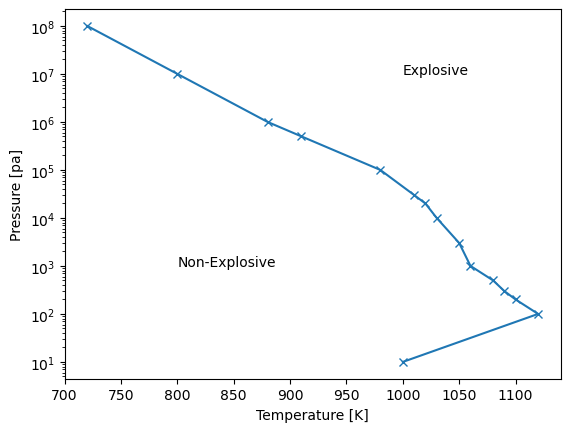

In [27]:

plt.plot(Temps,P,'x-')
plt.text(800,10**3,'Non-Explosive')
plt.text(1000,10**7,'Explosive')
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [pa]')
plt.yscale('log')


2) Temperature for time for some cases,  Induction time is calculated as the time at which the gradient of temperature with respect to time is max.

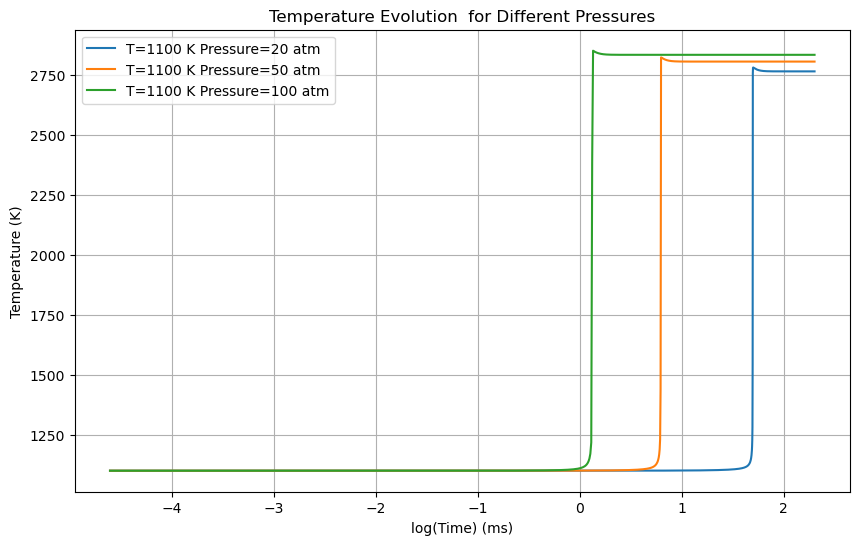

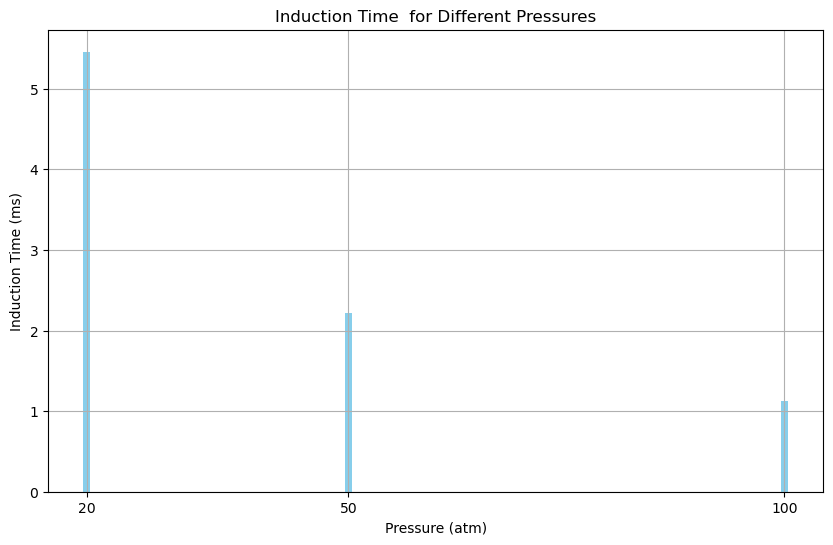

In [28]:



fixed_temperature = 1400  # K
pressures = [1,5, 10,50]  # atm

# Initialize list to store induction times
induction_times = []


plt.figure(figsize=(10, 6))

for p in pressures:
    gas = ct.Solution('gri30.yaml')
    fuel_species = 'C3H8'
    gas.set_equivalence_ratio(1.0, fuel_species, 'O2:1.0, N2:3.76')
    
    # Set temperature and pressure
    gas.TP = fixed_temperature, p * ct.one_atm  # Convert atm to Pa
    
  
    r = ct.IdealGasConstPressureReactor(gas)
    sim = ct.ReactorNet([r])
    
    
    time = 0.0
    dt = 1e-05
    ntimes = 1000
    
    states = ct.SolutionArray(gas, extra=['t'])
    
    gradT = np.zeros(ntimes)
    T_before = fixed_temperature
    
    # Induction time tracking
    induction_time = None

    # Advance the simulation
    for n in range(ntimes):
        time += dt
        sim.advance(time)
        states.append(r.thermo.state, t=time * 1e3)  # in ms

        # Calculate the temperature gradient
        gradT[n] = np.abs(T_before - gas.T) / dt
        T_before = gas.T

    # Identify the induction time as the time when the temperature gradient is maximum
    induction_time = states.t[np.argmax(gradT)]

    
    plt.plot(np.log(states.t), states.T, label=f'T={fixed_temperature} K Pressure={p} atm')

    
    induction_times.append(induction_time)





# Add plot labels and title for temperature evolution
plt.xlabel('log(Time) (ms)')
plt.ylabel('Temperature (K)')
plt.title('Temperature Evolution  for Different Pressures')
plt.legend()
plt.grid()
plt.show()

# New figure for induction times
plt.figure(figsize=(10, 6))
plt.bar(pressures, induction_times, color='skyblue')
plt.xlabel('Pressure (atm)')
plt.ylabel('Induction Time (ms)')
plt.title('Induction Time  for Different Pressures')
plt.xticks(pressures)
plt.grid()
plt.show()


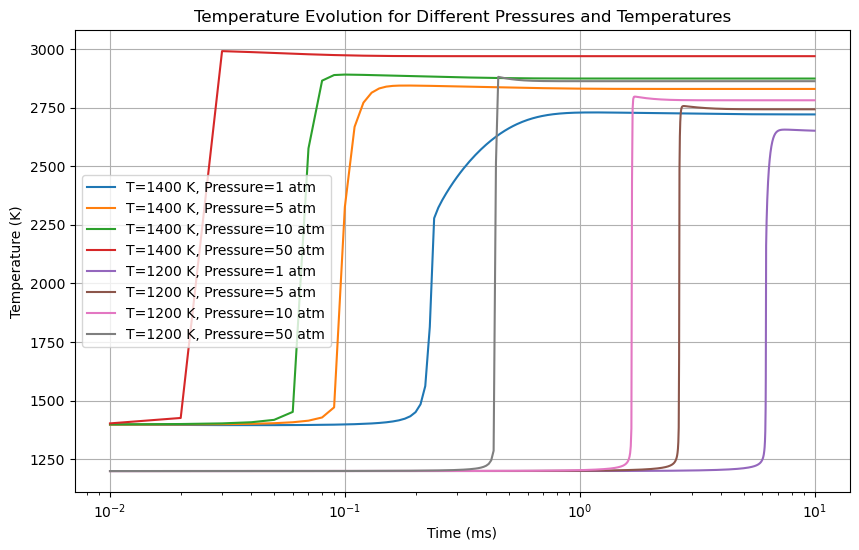

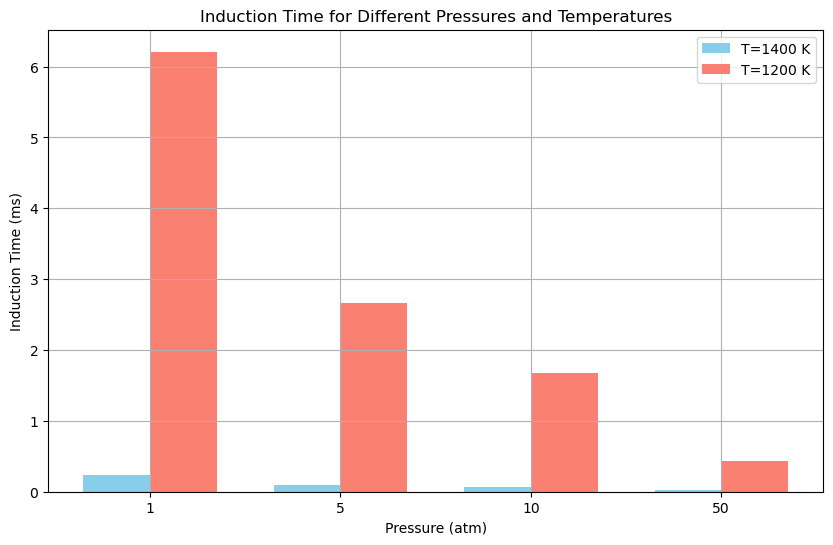

In [17]:
fixed_temperatures = [1400, 1200]  # K, temperatures to be plotted
pressures = [1, 5, 10, 50]  # atm

# Initialize list to store induction times for each temperature
induction_times_dict = {1400: [], 1200: []}

plt.figure(figsize=(10, 6))

for T_fixed in fixed_temperatures:
    for p in pressures:
        gas = ct.Solution('gri30.yaml')
        fuel_species = 'C3H8'
        gas.set_equivalence_ratio(1.0, fuel_species, 'O2:1.0, N2:3.76')

        # Set temperature and pressure
        gas.TP = T_fixed, p * ct.one_atm  # Convert atm to Pa

        r = ct.IdealGasConstPressureReactor(gas)
        sim = ct.ReactorNet([r])

        time = 0.0
        dt = 1e-05
        ntimes = 1000

        states = ct.SolutionArray(gas, extra=['t'])

        gradT = np.zeros(ntimes)
        T_before = T_fixed

        # Induction time tracking
        induction_time = None

        # Advance the simulation
        for n in range(ntimes):
            time += dt
            sim.advance(time)
            states.append(r.thermo.state, t=time * 1e3)  # in ms

            # Calculate the temperature gradient
            gradT[n] = np.abs(T_before - gas.T) / dt
            T_before = gas.T

        # Identify the induction time as the time when the temperature gradient is maximum
        induction_time = states.t[np.argmax(gradT)]

        # Plot the temperature evolution for each case
        plt.plot(states.t, states.T, label=f'T={T_fixed} K, Pressure={p} atm')

        # Store induction times
        induction_times_dict[T_fixed].append(induction_time)

# Set x-axis to log scale
plt.xscale('log')

# Add plot labels and title for temperature evolution
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.title('Temperature Evolution for Different Pressures and Temperatures')
plt.legend()
plt.grid()
plt.show()

# New figure for induction times
plt.figure(figsize=(10, 6))

width = 0.35  # the width of the bars
x = np.arange(len(pressures))  # the label locations

# Plot induction times for 1400 K and 1100 K side by side
plt.bar(x - width/2, induction_times_dict[1400], width, label='T=1400 K', color='skyblue')
plt.bar(x + width/2, induction_times_dict[1200], width, label='T=1200 K', color='salmon')

# Add labels and title
plt.xlabel('Pressure (atm)')
plt.ylabel('Induction Time (ms)')
plt.title('Induction Time for Different Pressures and Temperatures')
plt.xticks(x, pressures)
plt.legend()
plt.grid()
plt.show()


3) Plots for showing the reaction zone with normalized mole fraction for T=1100K and P=10 atm

In [29]:
# gas.TP = 1100.0, 20*ct.one_atm
# r = ct.IdealGasConstPressureReactor(gas)

# sim = ct.ReactorNet([r])
# time = 0.0
# states = ct.SolutionArray(gas, extra=['t'])


# print('%10s %10s %10s %14s' % ('t [s]','T [K]','P [Pa]','u [J/kg]'))
# npoints =1000

# for n in range(npoints):
#     time += 1.e-5
#     sim.advance(time)
#     states.append(r.thermo.state, t=time*1e3)
#     print('%10.3e %10.f %10.f %14.6e' % (sim.time, r.T,
#                                           r.thermo.P, r.thermo.u))
    
# # plt.plot(np.log(states.t), np.log(states.X[:,gas.species_index('OH')]),label=f'OH')


# # plt.plot(np.log(states.t), np.log(states.X[:,gas.species_index('H')]),label=f'H')

# # plt.plot(np.log(states.t), np.log(states.X[:,gas.species_index('C3H8')]),label=f'C3H8')

    

# plt.plot(np.log(states.t), states.X[:,gas.species_index('OH')],label=f'OH')

# plt.figure()
# plt.plot(np.log(states.t), states.X[:,gas.species_index('H')],label=f'H')
# plt.figure()
# plt.plot(np.log(states.t), states.X[:,gas.species_index('C3H8')],label=f'C3H8')

# plt.figure()
# plt.plot(np.log(states.t), states.X[:,gas.species_index('CO')],label=f'CO')

# plt.figure()
# plt.plot(np.log(states.t), states.X[:,gas.species_index('NO')],label=f'NO')



     t [s]      T [K]     P [Pa]       u [J/kg]


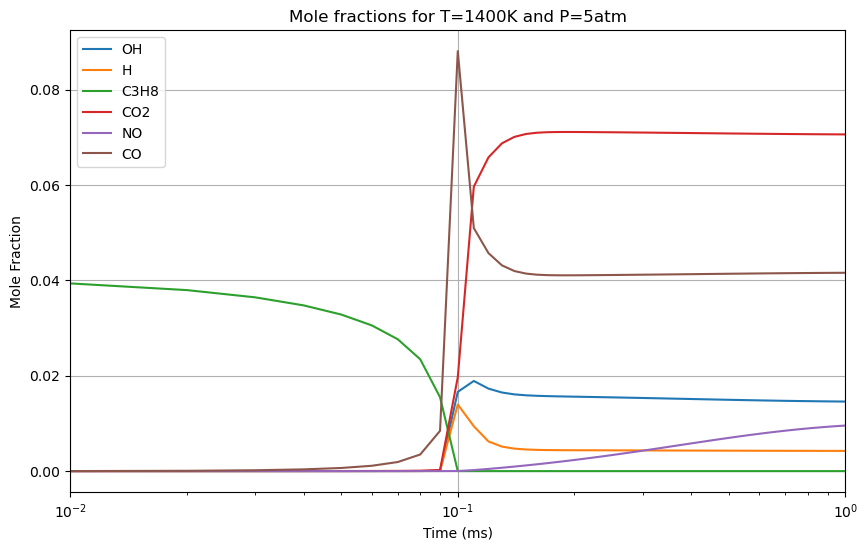

In [20]:
import matplotlib.pyplot as plt
import cantera as ct
import numpy as np

# Reactor setup and simulation code as provided earlier

gas = ct.Solution('gri30.yaml')
fuel_species = 'C3H8'
gas.set_equivalence_ratio(1.0, fuel_species, 'O2:1.0, N2:3.76')
gas.TP = 1400.0, 5 * ct.one_atm  # Set temperature and pressure
r = ct.IdealGasConstPressureReactor(gas)

sim = ct.ReactorNet([r])
time = 0.0
states = ct.SolutionArray(gas, extra=['t'])

# Print header
print('%10s %10s %10s %14s' % ('t [s]', 'T [K]', 'P [Pa]', 'u [J/kg]'))

npoints = 10000

# Reactor simulation
for n in range(npoints):
    time += 1.e-5
    sim.advance(time)
    states.append(r.thermo.state, t=time * 1e3)  # Storing time in ms

# Mole fraction plots without normalization

plt.figure(figsize=(10, 6))

plt.plot(states.t, states.X[:, gas.species_index('OH')], label='OH')
plt.plot(states.t, states.X[:, gas.species_index('H')], label='H')
plt.plot(states.t, states.X[:, gas.species_index('C3H8')], label='C3H8')
plt.plot(states.t, states.X[:, gas.species_index('CO2')], label='CO2')
plt.plot(states.t, states.X[:, gas.species_index('NO')], label='NO')
plt.plot(states.t, states.X[:, gas.species_index('CO')], label='CO')

# Set x-axis to logarithmic scale for tick marks
plt.xscale('log')

# Adding labels, legend, and axis limits
plt.xlabel('Time (ms)')
plt.ylabel('Mole Fraction')
plt.title('Mole fractions for T=1400K and P=5atm')
plt.xlim([1e-2, 1])  # Adjust limits for log-scale to fit your data
plt.legend()
plt.grid()
plt.show()


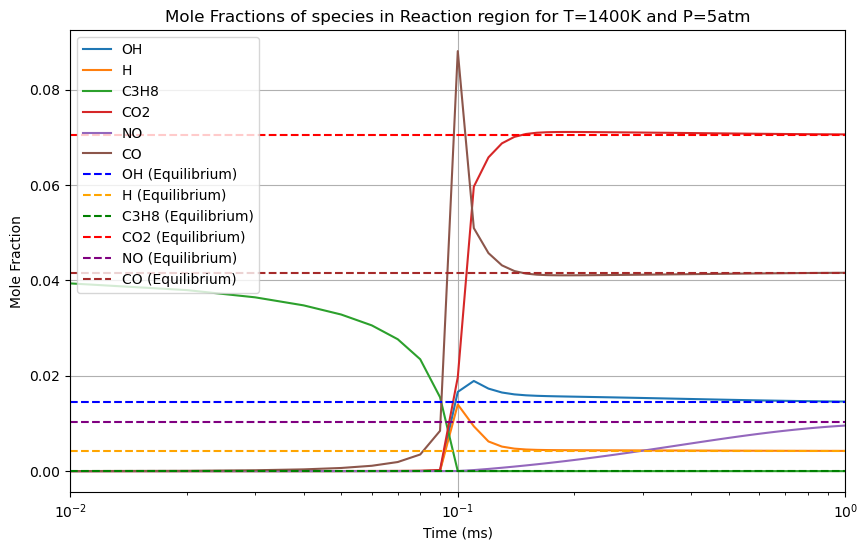

In [24]:
import matplotlib.pyplot as plt
import cantera as ct
import numpy as np

# Reactor setup
gas = ct.Solution('gri30.yaml')
fuel_species = 'C3H8'
gas.set_equivalence_ratio(1.0, fuel_species, 'O2:1.0, N2:3.76')
gas.TP = 1400.0, 5 * ct.one_atm  # Set temperature and pressure

# Store initial gas state for simulation
r = ct.IdealGasConstPressureReactor(gas)
sim = ct.ReactorNet([r])

# SolutionArray to store the simulation results
states = ct.SolutionArray(gas, extra=['t'])

# Number of time points to simulate
npoints = 10000
time = 0.0

# Reactor simulation loop
for n in range(npoints):
    time += 1.e-5
    sim.advance(time)
    states.append(r.thermo.state, t=time * 1e3)  # Store time in ms

# Now compute the equilibrium state for the same conditions (T = 1400K, P = 5atm)
gas.equilibrate('TP')  # Equilibrate the gas at constant temperature and pressure

# Get the equilibrium mole fractions of the species of interest
eq_OH = gas['OH'].X[0]
eq_H = gas['H'].X[0]
eq_C3H8 = gas['C3H8'].X[0]
eq_CO2 = gas['CO2'].X[0]
eq_NO = gas['NO'].X[0]
eq_CO = gas['CO'].X[0]

# Plot the species mole fractions from the simulation
plt.figure(figsize=(10, 6))

plt.plot(states.t, states.X[:, gas.species_index('OH')], label='OH')
plt.plot(states.t, states.X[:, gas.species_index('H')], label='H')
plt.plot(states.t, states.X[:, gas.species_index('C3H8')], label='C3H8')
plt.plot(states.t, states.X[:, gas.species_index('CO2')], label='CO2')
plt.plot(states.t, states.X[:, gas.species_index('NO')], label='NO')
plt.plot(states.t, states.X[:, gas.species_index('CO')], label='CO')

# Add horizontal lines for the equilibrium mole fractions
plt.axhline(eq_OH, color='blue', linestyle='--', label='OH (Equilibrium)')
plt.axhline(eq_H, color='orange', linestyle='--', label='H (Equilibrium)')
plt.axhline(eq_C3H8, color='green', linestyle='--', label='C3H8 (Equilibrium)')
plt.axhline(eq_CO2, color='red', linestyle='--', label='CO2 (Equilibrium)')
plt.axhline(eq_NO, color='purple', linestyle='--', label='NO (Equilibrium)')
plt.axhline(eq_CO, color='brown', linestyle='--', label='CO (Equilibrium)')

# Set x-axis to logarithmic scale for tick marks
plt.xscale('log')

# Adding labels, legend, and axis limits
plt.xlabel('Time (ms)')
plt.ylabel('Mole Fraction')
plt.title('Mole Fractions of species in Reaction region for T=1400K and P=5atm')
plt.xlim([1e-2, 1])  # Adjust limits for log-scale to fit your data
plt.legend()
plt.grid()
plt.show()


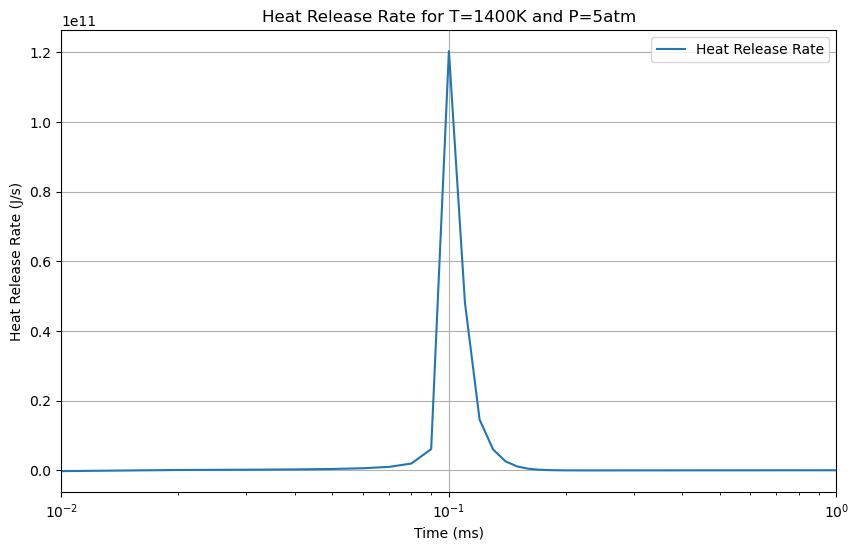

In [22]:
import matplotlib.pyplot as plt
import cantera as ct
import numpy as np

# Reactor setup
gas = ct.Solution('gri30.yaml')
fuel_species = 'C3H8'
gas.set_equivalence_ratio(1.0, fuel_species, 'O2:1.0, N2:3.76')
gas.TP = 1400.0, 5 * ct.one_atm  # Set temperature and pressure
r = ct.IdealGasConstPressureReactor(gas)

sim = ct.ReactorNet([r])
time = 0.0
states = ct.SolutionArray(gas, extra=['t'])

npoints = 10000

# Initialize variables to store HRR and time data
heat_release_rate = np.zeros(npoints)
time_data = np.zeros(npoints)

# Reactor simulation loop
T_before = gas.T
cp = gas.cp_mass  # Constant-pressure specific heat capacity (J/kg-K)

for n in range(npoints):
    time += 1.e-5
    sim.advance(time)
    
    # Calculate HRR as cp * dT/dt
    dT = gas.T - T_before  # Change in temperature
    heat_release_rate[n] = cp * dT / 1.e-5  # HRR ~ cp * dT/dt
    time_data[n] = time * 1e3  # Store time in ms
    
    T_before = gas.T  # Update previous temperature
    states.append(r.thermo.state, t=time * 1e3)  # Store state data

# Plotting Heat Release Rate vs Time
plt.figure(figsize=(10, 6))

plt.plot(time_data, heat_release_rate, label='Heat Release Rate')

# Set x-axis to logarithmic scale for tick marks
plt.xscale('log')

# Adding labels, legend, and axis limits
plt.xlabel('Time (ms)')
plt.ylabel('Heat Release Rate (J/s)')
plt.title('Heat Release Rate for T=1400K and P=5atm')
plt.xlim([1e-2, 1])  # Adjust limits for log-scale
plt.grid(True)
plt.legend()
plt.show()
